In [1]:
# Pràctica 6 secció 5

# Problema Predador-Presa


In [98]:
var("x y");

In [119]:
eq1=2.*x-0.5*x^2-1.*x*y

In [120]:
eq2=0.5*x*y-1.*y

In [121]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0], [x == 4, y == 0], [x == 2, y == 1]]

In [122]:
px1=sol[0][0].rhs();px1

0

In [123]:
py1=sol[0][1].rhs();py1

0

In [124]:
px2=sol[1][0].rhs();px2

4

In [125]:
py2=sol[1][1].rhs();py2

0

In [126]:
px3=sol[2][0].rhs();px3

2

In [127]:
py3=sol[2][1].rhs();py3

1

In [128]:
# Aquest sistema només té 3 punts singulars

In [129]:
qx=max(px1,px2,px3);qx

4

In [130]:
qy=max(py1,py2,py3);qy

1

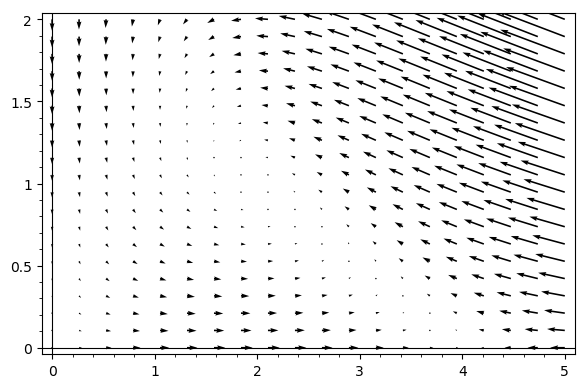

In [131]:
plot=plot_vector_field((eq1,eq2), (x,0,qx+1), (y,0,qy+1));plot

In [132]:
var("t");

In [133]:
# Estudiem primer que és cada punt singular

In [134]:
# El (0,0) és trivialment una sella. Les separatrius son els eixos. Atractora en el sentit vertical
# i repulsora en l'horitzontal.

In [135]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[ 2.00000000000000                 0]
[                0 -1.00000000000000]

In [136]:
A.eigenvalues()

[-1, 2]

In [137]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px3,y=py3);A

[-1.00000000000000 -2.00000000000000]
[0.500000000000000 0.000000000000000]

In [138]:
A.eigenvalues()

[-1/2*I*sqrt(3) - 1/2, 1/2*I*sqrt(3) - 1/2]

In [94]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(-0.250000000000000 - 0.968245836551854*I,
 -0.250000000000000 + 0.968245836551854*I)

In [95]:
# Aquest és un node atractor

In [36]:
# Anem pel darrer punt singular

In [37]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px3,y=py3);A

[-2.66666666666667 -4.00000000000000]
[-1.66666666666667 0.000000000000000]

In [38]:
A.eigenvalues()

[-2/3*sqrt(19) - 4/3, 2/3*sqrt(19) - 4/3]

In [39]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(-4.23926596236045, 1.57259929569378)

In [40]:
# Es una sella

In [42]:
px=px3;py=py3;h=0.01;step1=0.01;

In [43]:
vec=A.eigenvectors_right();vec

[(-1/1125899906842624*sqrt(10704605068593936542694434377273) - 1501199875790165/1125899906842624,
  [(1, 1/4503599627370496*sqrt(10704605068593936542694434377273) - 1501199875790165/4503599627370496)],
  1),
 (1/1125899906842624*sqrt(10704605068593936542694434377273) - 1501199875790165/1125899906842624,
  [(1, -1/4503599627370496*sqrt(10704605068593936542694434377273) - 1501199875790165/4503599627370496)],
  1)]

In [44]:
vec[0][0]

-1/1125899906842624*sqrt(10704605068593936542694434377273) - 1501199875790165/1125899906842624

In [45]:
kt=1;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [46]:
sol1=[[j,k] for i,j,k in sol]

In [47]:
if(vec[0][0]<0):
    sep5=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep5=list_plot(sol1,color="red")

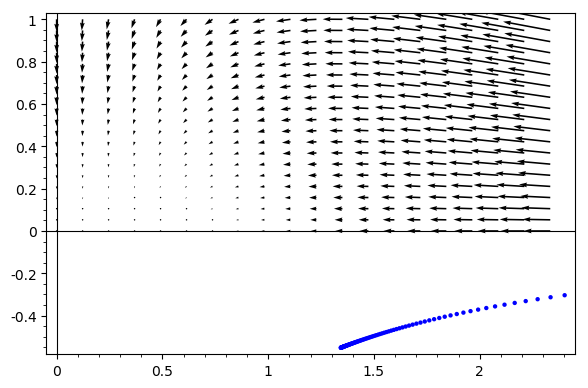

In [48]:
plot+sep5

In [49]:
kt=20;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                      end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [50]:
sol1=[[j,k] for i,j,k in sol]

In [51]:
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")

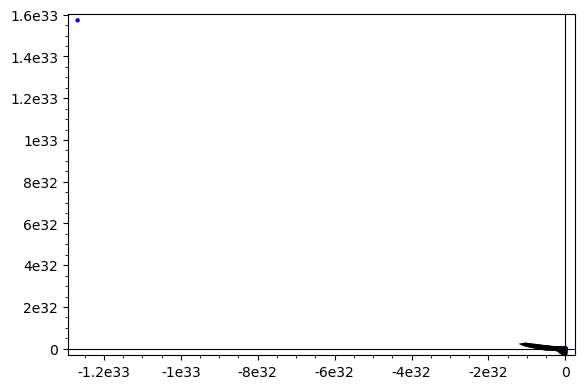

In [52]:
plot+sep6

In [53]:
kt=3.4;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [54]:
sol1=[[j,k] for i,j,k in sol]

In [55]:
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")

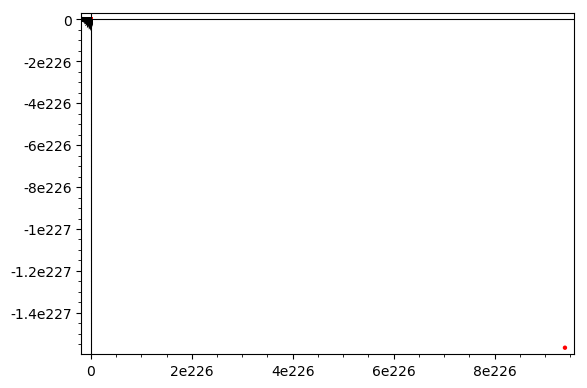

In [56]:
plot+sep7

In [57]:
kt=7.8;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [58]:
sol1=[[j,k] for i,j,k in sol]

In [59]:
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")

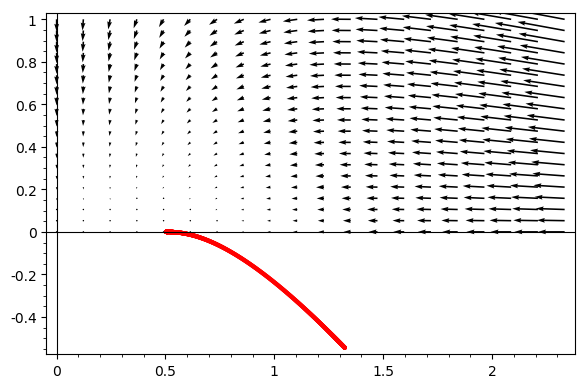

In [60]:
plot+sep8

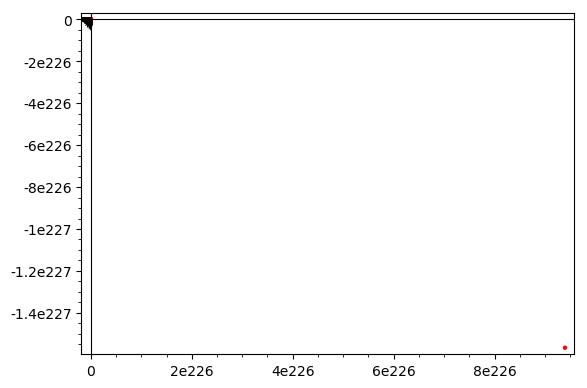

In [61]:
plot+sep5+sep6+sep7+sep8

In [62]:
# Amb el veiem aquí, i sapiguent que no hi ha més punts singulars, 
# ja podem saber que farà qualsevol altra òrbita que passi per un punt concret.

In [63]:
px=1;py=1;kt=10;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [64]:
sol1=[[j,k] for i,j,k in sol]

In [65]:
orb1=list_plot(sol1,color="yellow")

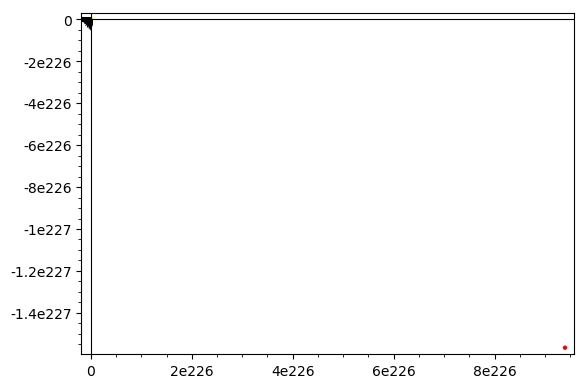

In [66]:
plot+sep5+sep6+sep7+sep8+orb1

In [67]:
px=0.5;py=0.5;kt=10;sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [68]:
sol1=[[j,k] for i,j,k in sol]

In [69]:
orb2=list_plot(sol1,color="yellow")

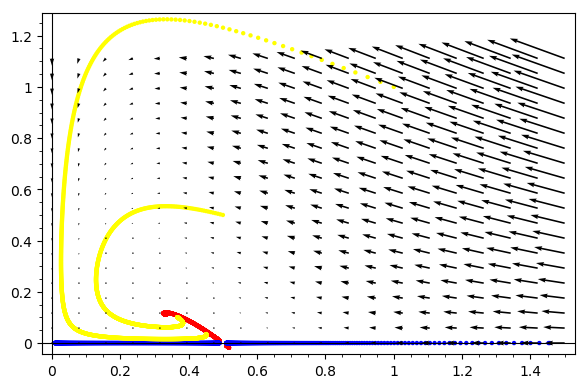

In [60]:
plot+sep5+sep6+sep7+sep8+orb1+orb2